# <font color='blue'>AutoML em Python</font>
# <font color='blue'>Machine Learning</font>

## Processo Tradicional de Machine Learning - Parte 1 - Modelos de Regressão e Classificação Simples

## Fonte de Dados

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.4


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q watermark

In [3]:
/pip install pydotplus

In [4]:
!pip install sklearn

In [5]:
# Imports
import pydotplus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import sklearn.tree as tree
from six import StringIO
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from IPython.display import Image
%matplotlib inline

In [6]:
!pip install watermark

In [7]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Ricardo Roberto de Lima" --iversions

Author: Ricardo Roberto de Lima

matplotlib: 3.1.3
sklearn   : 0.0
numpy     : 1.18.1
pandas    : 1.0.1
pydotplus : 2.0.2
seaborn   : 0.10.0



## Carga e Exploração dos Dados

In [8]:
# Carrega os dados
dataset = fetch_california_housing()

In [9]:
# Elementos dos dados
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [10]:
# Converte em dataframe
dados = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [11]:
# Extrai a variável target
target = pd.Series(dataset.target, name = 'MedPrice')

In [12]:
# Shape
dados.shape

(20640, 8)

In [13]:
# Tipos de dados
dados.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [14]:
# Visualiza
dados.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
# Resumo estatístico
pd.options.display.float_format = '{:,.2f}'.format
dados.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,3.87,28.64,5.43,1.10,"1,425.48",3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,"1,132.46",10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,"1,166.00",2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,"1,725.00",3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,"35,682.00","1,243.33",41.95,-114.31


In [16]:
# Verificando valores nulos
dados.isnull().any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool

In [17]:
# Divisão em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(dados, target, test_size = 0.2, random_state = 42)

In [18]:
# Shape
print("Shape Atributos em Treino: {}".format(X_treino.shape))
print("Shape Target em Treino: {}".format(y_treino.shape))
print("Shape Atributos em Teste: {}".format(X_teste.shape))
print("Shape Target em Teste: {}".format(y_teste.shape))

Shape Atributos em Treino: (16512, 8)
Shape Target em Treino: (16512,)
Shape Atributos em Teste: (4128, 8)
Shape Target em Teste: (4128,)


## Engenharia de Atributos

In [19]:
# Cópia dos dados de treino
dados_treino = X_treino.copy()

In [20]:
# Adiciona target ao dataset
dados_treino['MedPrice'] = y_treino

In [21]:
# Visualiza
dados_treino.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedPrice
14196,3.26,33.00,5.02,1.01,"2,300.00",3.69,32.71,-117.03,1.03
8267,3.81,49.00,4.47,1.04,"1,314.00",1.74,33.77,-118.16,3.82
17445,4.16,4.00,5.65,0.99,915.00,2.72,34.66,-120.48,1.73
14265,1.94,36.00,4.00,1.03,"1,418.00",3.99,32.69,-117.11,0.93
2271,3.55,43.00,6.27,1.13,874.00,2.30,36.78,-119.80,0.96


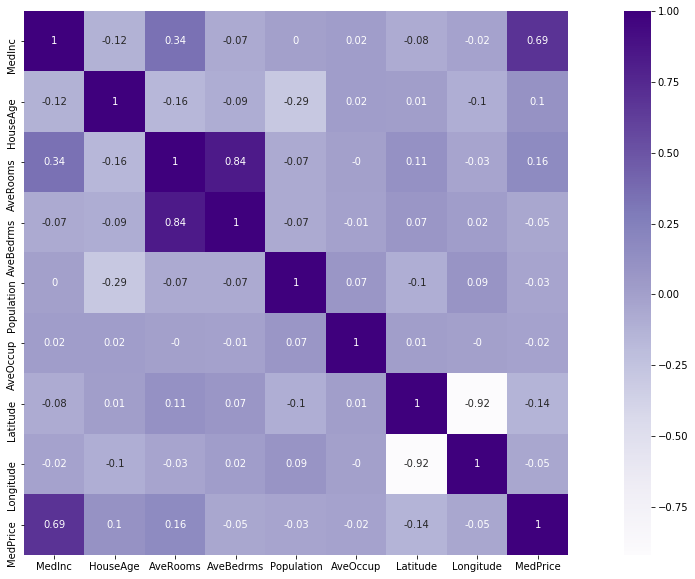

In [22]:
# Plot de correlação dos atributos com a variável target
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
correlation_matrix = dados_treino.corr().round(2)
plt.figure(figsize = (20,10))
sns.heatmap(data = correlation_matrix, square = True, annot = True, cmap = 'Purples') 

In [23]:
# Seleciona recursos de alta correlação
selected_feature_set = ['MedInc', 'AveRooms']  
sub_dados_treino = dados_treino[ selected_feature_set + ['MedPrice']] 

# Extrai os novos recursos de treinamento
X_treino = sub_dados_treino.drop(['MedPrice'], axis = 1)

# Seleciona os mesmos conjuntos de recursos para dados de teste
X_teste = X_teste[selected_feature_set]

In [24]:
X_treino.head()

,MedInc,AveRooms
14196,3.26,5.02
8267,3.81,4.47
17445,4.16,5.65
14265,1.94,4.00
2271,3.55,6.27


In [25]:
X_teste.head()

,MedInc,AveRooms
20046,1.68,4.19
3024,2.53,5.04
15663,3.48,3.98
20484,5.74,6.16
9814,3.73,5.49


## Modelagem 1

In [26]:
# Cria o modelo
linear_regressor = LinearRegression()

# Treina o modelo
linear_regressor.fit(X_treino, y_treino)

# Extrai os coeficientes
coeffcients = pd.DataFrame(linear_regressor.coef_, X_treino.columns, columns = ['Coefficient'])  

# Imprime o intercepto
print("Intercepto (coeficiente aprendido): {:.2f}".format(linear_regressor.intercept_))

print("\nCoeficientes das Variáveis:\n")
print(coeffcients)

Intercepto (coeficiente aprendido): 0.60

Coeficientes das Variáveis:

          Coefficient
MedInc           0.44
AveRooms        -0.04


## Avaliação do Modelo 1

In [27]:
# Previsões em treino e teste
y_pred_treino = linear_regressor.predict(X_treino)
y_pred_teste = linear_regressor.predict(X_teste)

In [28]:
# Print
print('MSE em Treino: {}'.format(mean_squared_error(y_treino, y_pred_treino)))
print('MSE em Teste: {:.2f}'.format(mean_squared_error(y_teste, y_pred_teste)))

MSE em Treino: 0.690985965844761
MSE em Teste: 0.70


In [29]:
!pip install seaborn

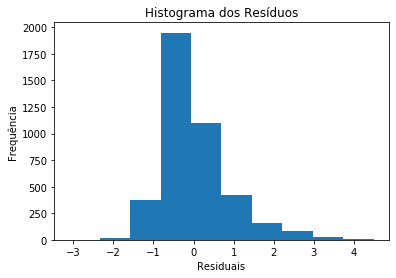

In [30]:
# Checando a normalidade dos erros
plt.hist(y_teste - y_pred_teste)
plt.title("Histograma dos Resíduos")
plt.xlabel("Residuais")
plt.ylabel("Frequência")
plt.show()

## Modelagem 2

In [31]:
!pip install GraphViz

In [32]:
# Cria o modelo
tree_regressor = DecisionTreeRegressor(max_depth = 3, random_state = 42)

# Treina o modelo
tree_regressor.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=3, random_state=42)

## Avaliação do Modelo 2

In [33]:
# Previsões em treino e teste
y_pred_treino = tree_regressor.predict(X_treino)
y_pred_teste = tree_regressor.predict(X_teste)

In [34]:
# Print
print('MSE em Treino: {:.2f}'.format(mean_squared_error(y_treino, y_pred_treino)))
print('MSE em Teste: {:.2f}'.format(mean_squared_error(y_teste, y_pred_teste)))

MSE em Treino: 0.68
MSE em Teste: 0.71


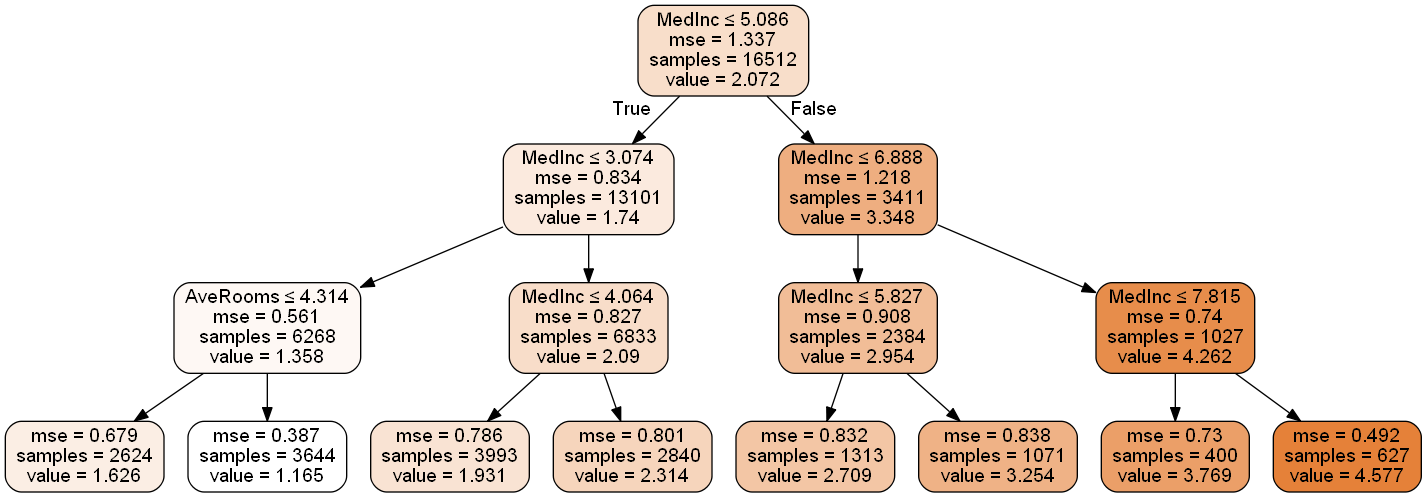

In [35]:
# Visualizando o modelo
dot_data = StringIO()
tree.export_graphviz(tree_regressor, 
                     out_file = dot_data, 
                     class_names = ['MedPrice'], 
                     feature_names = selected_feature_set,
                     filled = True, 
                     rounded = True, 
                     special_characters  = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

Image(graph.create_png())

## Otimização de Hiperparâmetros

In [36]:
# Validação Cruzada
kf = KFold(n_splits = 5) 

cv_sets = []

for train_index, test_index in kf.split(X_treino):
    cv_sets.append((X_treino.iloc[train_index], 
                    y_treino.iloc[train_index], 
                    X_treino.iloc[test_index],
                    y_treino.iloc[test_index])) 

In [37]:
# Range de valores para o hiperparâmetro max_depths
max_depths = list(range(1, 11))  

In [38]:
# Loop de CV
for max_depth in max_depths:
    cv_results = []
    regressor = DecisionTreeRegressor(max_depth = max_depth, random_state = 42)    
    for x_tr, y_tr, x_te, y_te in cv_sets: 
        regressor.fit(x_tr, y_tr)
        cv_results.append(mean_squared_error(regressor.predict(x_te) , y_te))
    print('Tree depth: {}, MSE Médio: {}'.format(max_depth, np.mean(cv_results))) 

Tree depth: 1, MSE Médio: 0.9167053334390705
Tree depth: 2, MSE Médio: 0.7383634845663015
Tree depth: 3, MSE Médio: 0.68854467373395
Tree depth: 4, MSE Médio: 0.6388802215441052
Tree depth: 5, MSE Médio: 0.6229559075742178
Tree depth: 6, MSE Médio: 0.6181574550660847
Tree depth: 7, MSE Médio: 0.6315191091236836
Tree depth: 8, MSE Médio: 0.6531981343523263
Tree depth: 9, MSE Médio: 0.6778198281721838
Tree depth: 10, MSE Médio: 0.7023437729999482


## Modelagem 3

In [39]:
# Cria o modelo
tree_regressor = DecisionTreeRegressor(max_depth = 6, random_state = 42)

# Treina o modelo
tree_regressor.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=6, random_state=42)

## Avaliação do Modelo 3

In [40]:
# Previsões em treino e teste
y_pred_treino = tree_regressor.predict(X_treino)
y_pred_teste = tree_regressor.predict(X_teste)

In [41]:
# Print
print('MSE em Treino: {:.2f}'.format(mean_squared_error(y_treino, y_pred_treino)))
print('MSE em Teste: {:.2f}'.format(mean_squared_error(y_teste, y_pred_teste)))

MSE em Treino: 0.58
MSE em Teste: 0.64


# Terminando o Caderno